Base de datos: https://physionet.org/content/heart-lung-segmentations-data/1.0.0/

La base de datos cuenta con imágenes segmentadas de corazón y pulmón. Está destinada para entrenar modelos de detección/segmentación del corazón y los pulmones para el diagnóstico de cardiomegalia. Buscar impulsar el desarrollo de modelos de IA relacionados con la identificación del corazón y los pulmones en las radiografías de tórax.

In [88]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
lung_path = '/content/drive/MyDrive/Patronus/clase8/data/lungs/'
heart_path = '/content/drive/MyDrive/Patronus/clase8/data/heart/'


def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder, filename), color_mode='grayscale')
        if img is not None:
            img = tf.keras.preprocessing.image.img_to_array(img)
            img = tf.image.resize(img, (256, 256))
            images.append(img)
            if 'lungs' in folder:
                labels.append(0)  # Class 0 for lungs
            elif 'heart' in folder:
                labels.append(1)  # Class 1 for heart
    return np.array(images), np.array(labels)

num = 50 #num de imagenes
lung_images, lung_labels = load_images_from_folder(lung_path)
heart_images, heart_labels = load_images_from_folder(heart_path)

images = np.concatenate((lung_images[0:num], heart_images[0:num]), axis=0)
labels = np.concatenate((lung_labels[0:num], heart_labels[0:num]), axis=0)

images = images / 255.0  # Normalize images

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 1)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
3/3 [==============================] - 3s 715ms/step - loss: 0.5096 - accuracy: 0.7625 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 2s 618ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 2s 612ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 2s 626ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 2s 744ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 3s 797ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.000

1/1 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - accuracy: 1.0000

Test accuracy: 1.0

Test loss: 0.0


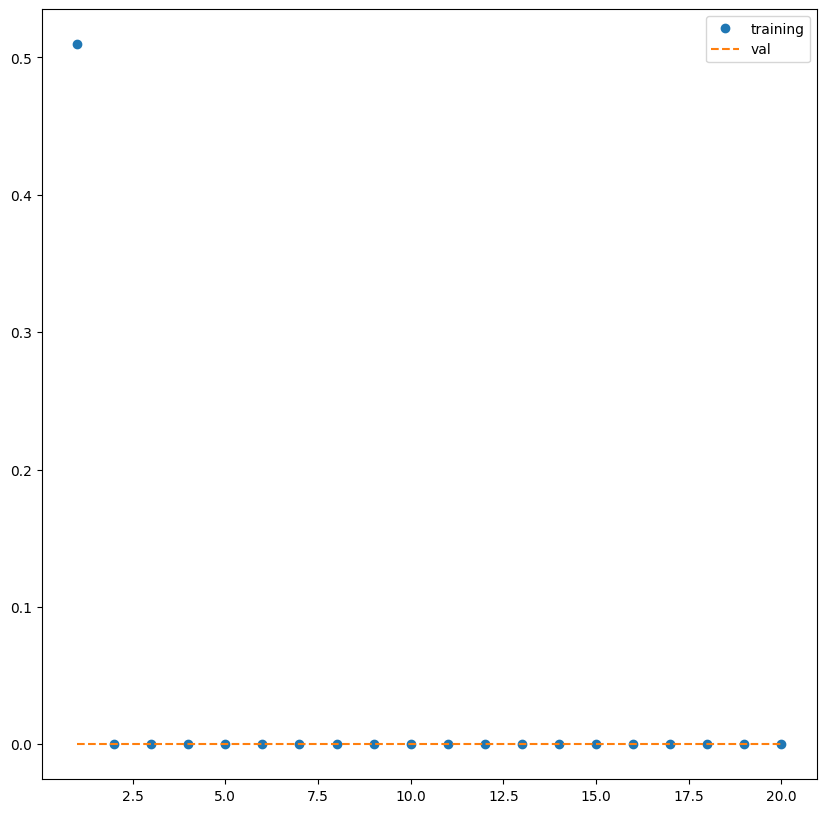

In [93]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

**Reducir capas, regularizar y dropout**

In [94]:
drop_reg_reduce_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 1)),
    tf.keras.layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
drop_reg_reduce_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
history = drop_reg_reduce_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
3/3 [==============================] - 1s 130ms/step - loss: 2.0145 - accuracy: 0.6625 - val_loss: 0.3326 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 36ms/step - loss: 3.4292 - accuracy: 0.7375 - val_loss: 0.3110 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 39ms/step - loss: 2.0786 - accuracy: 0.8000 - val_loss: 0.3220 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 41ms/step - loss: 2.2442 - accuracy: 0.8250 - val_loss: 0.3396 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 35ms/step - loss: 1.4790 - accuracy: 0.8625 - val_loss: 0.3523 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 41ms/step - loss: 1.4511 - accuracy: 0.7875 - val_loss: 0.3584 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 36ms/step - loss: 0.6822 - accuracy: 0.9000 - val_loss: 0.3609 - val_accuracy: 1.0000
Epoch 8/20
3/3 [==========

1/1 [==============================] - 0s 31ms/step - loss: 0.3450 - accuracy: 1.0000

Test accuracy: 1.0

Test loss: 0.3449597656726837


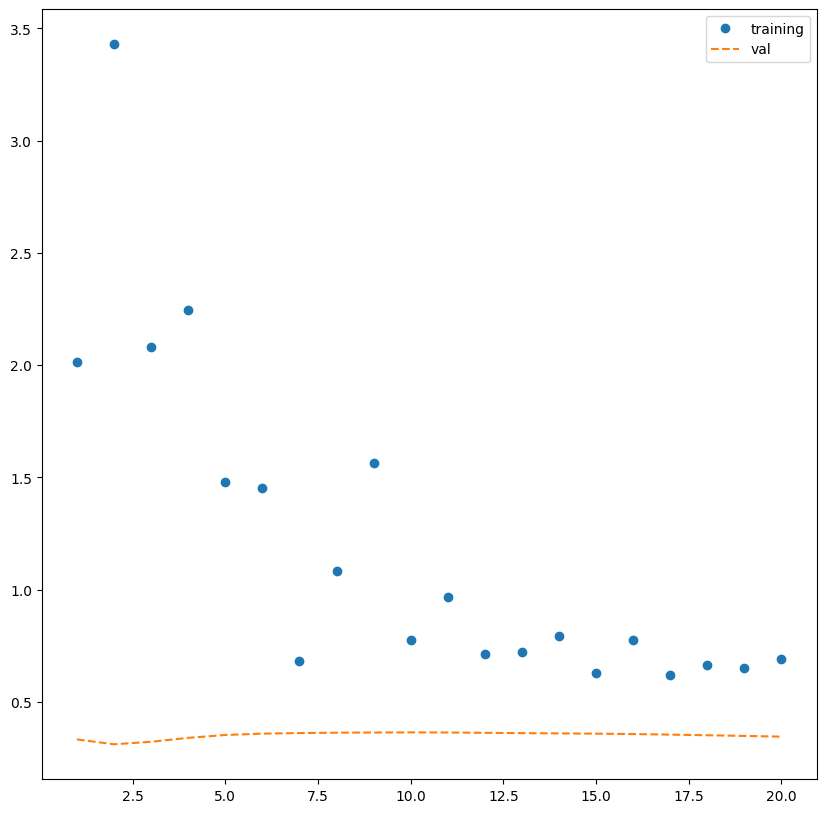

In [96]:
test_loss, test_acc = drop_reg_reduce_model.evaluate(X_val, y_val)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

**Reducir las capas y regularizar**

In [97]:
from tensorflow.keras import regularizers

reg_reduce_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 1)),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(2, activation='softmax')
])
reg_reduce_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
history = reg_reduce_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
3/3 [==============================] - 2s 185ms/step - loss: 1.8712 - accuracy: 0.7250 - val_loss: 1.2781 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 90ms/step - loss: 1.2232 - accuracy: 1.0000 - val_loss: 1.1234 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 81ms/step - loss: 1.1134 - accuracy: 1.0000 - val_loss: 1.1053 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 86ms/step - loss: 1.1089 - accuracy: 1.0000 - val_loss: 1.1171 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 89ms/step - loss: 1.1160 - accuracy: 1.0000 - val_loss: 1.1039 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 82ms/step - loss: 1.0935 - accuracy: 1.0000 - val_loss: 1.0585 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 84ms/step - loss: 1.0426 - accuracy: 1.0000 - val_loss: 0.9974 - val_accuracy: 1.0000
Epoch 8/20
3/3 [==========

1/1 [==============================] - 0s 49ms/step - loss: 0.4494 - accuracy: 1.0000

Test accuracy: 1.0

Test loss: 0.4494369924068451


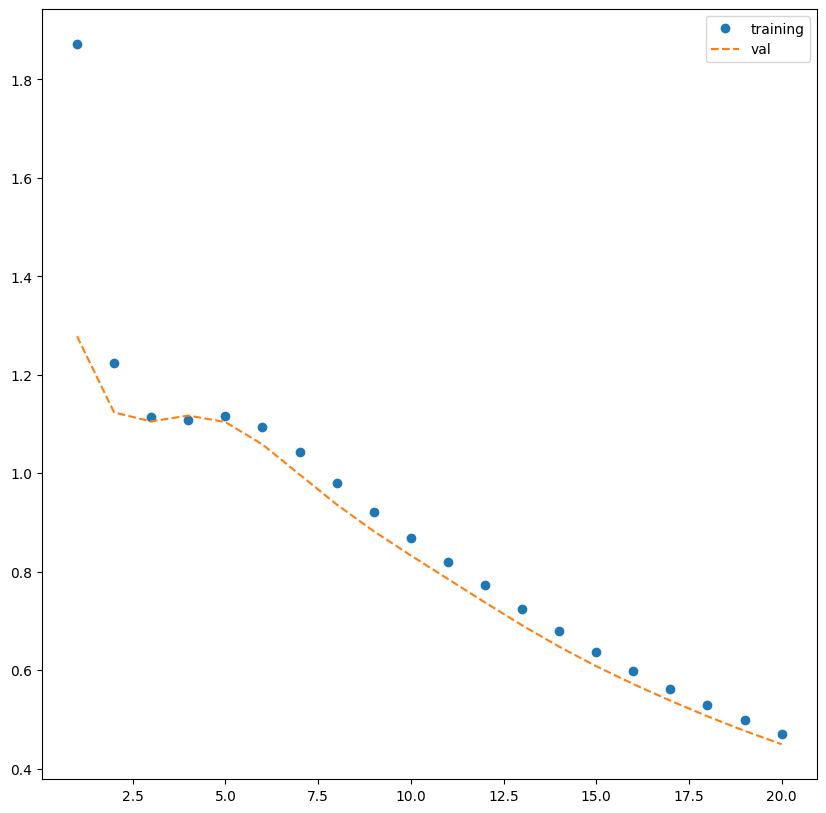

In [99]:
test_loss, test_acc = reg_reduce_model.evaluate(X_val, y_val)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

Regularizar y dropout

In [100]:
drop_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 1)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
drop_reg_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
history = drop_reg_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
3/3 [==============================] - 5s 832ms/step - loss: 2.3546 - accuracy: 0.7250 - val_loss: 1.2347 - val_accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 2s 737ms/step - loss: 2.2624 - accuracy: 0.9125 - val_loss: 1.1374 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 2s 757ms/step - loss: 1.5076 - accuracy: 0.9875 - val_loss: 1.1539 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 2s 729ms/step - loss: 1.3827 - accuracy: 0.9875 - val_loss: 1.2087 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 2s 873ms/step - loss: 1.2272 - accuracy: 1.0000 - val_loss: 1.2542 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 1.2615 - accuracy: 1.0000 - val_loss: 1.2756 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 3s 716ms/step - loss: 1.2771 - accuracy: 1.0000 - val_loss: 1.2780 - val_accuracy: 1.0000
Epoch 8/20
3/3 [=======

1/1 [==============================] - 0s 76ms/step - loss: 1.1265 - accuracy: 1.0000

Test accuracy: 1.0

Test loss: 1.126534104347229


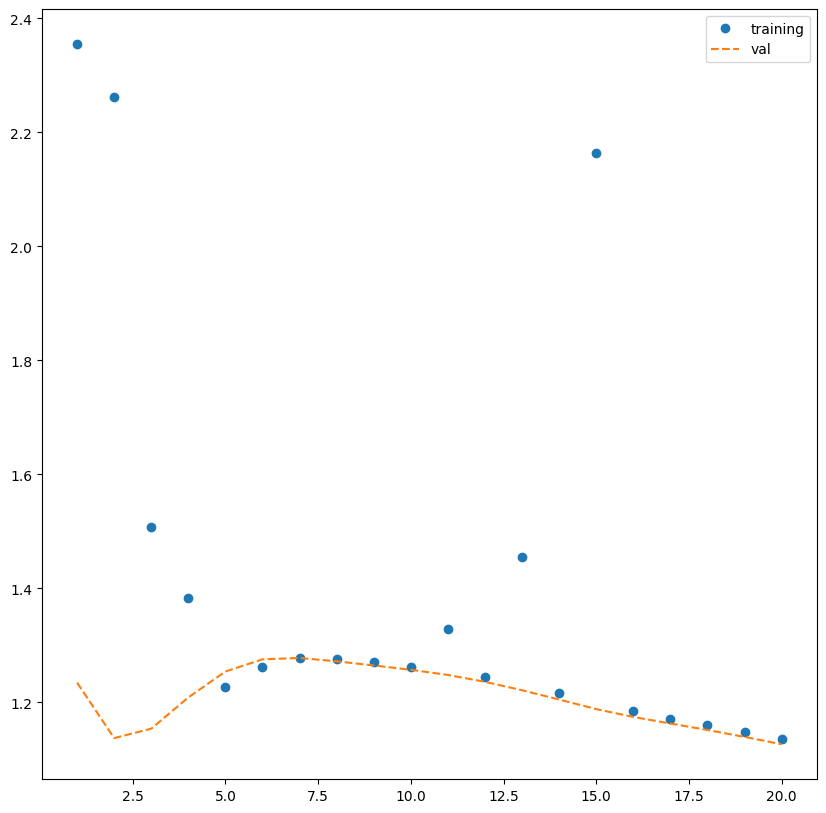

In [102]:
test_loss, test_acc = drop_reg_model.evaluate(X_val, y_val)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

A partir de las gráficas, se observa que se tuvo un mejor rendimiento cuando se redujo la cantidade de capas del modelo y se introdujo una regularización del tipo L2. Esto guarda relación a lo visto en clase en cuato a la complejidad que introduce un mayor número de capas en un modelo y cómo fomenta el overfitting. Analizando la base datos, las imágenes al ya estar segmentadas facilita el trabajo de clasificación al modelo, por lo que la complejidad se reduce al ya estar pre procesadas de manera adecuada. Eso se ve reflejada al tener un desempeño aceptable con un número de capas y neuronas reducidas, a comparación del modelo inicial.